In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

pd.options.display.max_columns = 40

In [3]:
data = pd.read_csv('/data_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/data_cleaned.csv'

In [32]:
data

,customer_unique_id,Nb_pdts,categorie_la_plus_achetee,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Moy_Paiment,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,1.0,home,89.80,1.0,9.0,boleto,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085,cajamar,SP
1,290c77bc529b7ac935b93aa66c333dc3,1.0,home,54.90,1.0,14.0,credit_card,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516,osasco,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1.0,electronics,179.99,1.0,10.0,credit_card,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938,sao jose,SC
3,259dac757896d24d7702b9acbbff3f3c,1.0,home,149.90,1.0,14.0,credit_card,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748,belem,PA
4,345ecd01c38d18a9036ed96c73b8d066,1.0,arts,93.00,1.0,3.0,voucher,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820,sorocaba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95555,503f8e014d74b09cfe772d0279c361b9,1.0,arts,59.90,1.0,-1.0,credit_card,2,5.0,2017-06-24 19:38:52,19.0,5.0,14.13,-22.870003,-47.210739,sanharo,PE
95556,70b74561278df139c3b0554de10e3636,1.0,sports_leisure,6.00,1.0,-1.0,credit_card,8,2.0,2017-12-25 19:20:31,19.0,0.0,7.78,-21.751133,-43.365606,feira de santana,BA
95557,fd9c9d8749551eb44b8cf0ae092c92e1,1.0,health_beauty,199.90,1.0,-1.0,credit_card,2,5.0,2018-01-17 13:28:49,13.0,2.0,15.15,-23.136161,-46.468852,sinop,MT
95558,4ecd475fa895384081540b4322e94b65,1.0,fashion,286.40,1.0,-1.0,credit_card,3,5.0,2017-05-24 14:58:20,14.0,2.0,58.67,-22.892139,-43.347953,bom jesus do norte,ES


In [33]:
data.drop(['customer_city', 'customer_state'], axis=1, inplace=True)

In [34]:
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype('datetime64')

In [35]:
data.shape

(95560, 15)

In [36]:
data.set_index('customer_unique_id', inplace=True)

In [37]:
data

,Nb_pdts,categorie_la_plus_achetee,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Moy_Paiment,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng
customer_unique_id,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,home,89.80,1.0,9.0,boleto,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085
290c77bc529b7ac935b93aa66c333dc3,1.0,home,54.90,1.0,14.0,credit_card,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516
060e732b5b29e8181a18229c7b0b2b5e,1.0,electronics,179.99,1.0,10.0,credit_card,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938
259dac757896d24d7702b9acbbff3f3c,1.0,home,149.90,1.0,14.0,credit_card,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748
345ecd01c38d18a9036ed96c73b8d066,1.0,arts,93.00,1.0,3.0,voucher,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503f8e014d74b09cfe772d0279c361b9,1.0,arts,59.90,1.0,-1.0,credit_card,2,5.0,2017-06-24 19:38:52,19.0,5.0,14.13,-22.870003,-47.210739
70b74561278df139c3b0554de10e3636,1.0,sports_leisure,6.00,1.0,-1.0,credit_card,8,2.0,2017-12-25 19:20:31,19.0,0.0,7.78,-21.751133,-43.365606
fd9c9d8749551eb44b8cf0ae092c92e1,1.0,health_beauty,199.90,1.0,-1.0,credit_card,2,5.0,2018-01-17 13:28:49,13.0,2.0,15.15,-23.136161,-46.468852


# Vectorisation variable catégorielle

In [38]:
data = pd.get_dummies(data)

In [39]:
data.head()

,Nb_pdts,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Facilités,Note_Moyenne_Commentaire,order_purchase_timestamp,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,categorie_la_plus_achetee_appliances,categorie_la_plus_achetee_arts,categorie_la_plus_achetee_auto,categorie_la_plus_achetee_construction,categorie_la_plus_achetee_electronics,categorie_la_plus_achetee_fashion,categorie_la_plus_achetee_food_drinks,categorie_la_plus_achetee_garden_pets,categorie_la_plus_achetee_health_beauty,categorie_la_plus_achetee_home,categorie_la_plus_achetee_office,categorie_la_plus_achetee_other,categorie_la_plus_achetee_sports_leisure,Moy_Paiment_boleto,Moy_Paiment_credit_card,Moy_Paiment_debit_card,Moy_Paiment_not_defined,Moy_Paiment_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,1.0,89.80,1.0,9.0,1,1.0,2017-11-14 16:08:26,16.0,1.0,24.94,-23.340262,-46.831085,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
290c77bc529b7ac935b93aa66c333dc3,1.0,54.90,1.0,14.0,4,4.0,2017-07-16 09:40:32,9.0,6.0,12.51,-23.559044,-46.788516,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
060e732b5b29e8181a18229c7b0b2b5e,1.0,179.99,1.0,10.0,2,5.0,2017-02-28 11:06:43,11.0,1.0,15.43,-27.543010,-48.634938,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
259dac757896d24d7702b9acbbff3f3c,1.0,149.90,1.0,14.0,3,5.0,2017-08-16 13:09:20,13.0,2.0,29.45,-1.312726,-48.482748,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
345ecd01c38d18a9036ed96c73b8d066,1.0,93.00,1.0,3.0,1,4.0,2018-04-02 13:42:17,13.0,0.0,14.01,-23.505588,-47.469820,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data.dtypes

Nb_pdts                                            float64
Total_moyen_achats                                 float64
Nb_moyen_produits_par_commandes                    float64
Delai_Moyen_Commande                               float64
Facilités                                            int64
Note_Moyenne_Commentaire                           float64
order_purchase_timestamp                    datetime64[ns]
heure_achat                                        float64
jour_achat                                         float64
freight_value                                      float64
geolocation_lat                                    float64
geolocation_lng                                    float64
categorie_la_plus_achetee_appliances                 uint8
categorie_la_plus_achetee_arts                       uint8
categorie_la_plus_achetee_auto                       uint8
categorie_la_plus_achetee_construction               uint8
categorie_la_plus_achetee_electronics                uin

# Echantillonnage

In [41]:
X = data
#categorie_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64','uint8']).columns

# Normalisation

In [42]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X[numerical_columns])
X_scaled = std_scale.transform(X[numerical_columns])

In [43]:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=numerical_columns)

In [44]:
X_scaled_df

,Nb_pdts,Total_moyen_achats,Nb_moyen_produits_par_commandes,Delai_Moyen_Commande,Note_Moyenne_Commentaire,heure_achat,jour_achat,freight_value,geolocation_lat,geolocation_lng,categorie_la_plus_achetee_appliances,categorie_la_plus_achetee_arts,categorie_la_plus_achetee_auto,categorie_la_plus_achetee_construction,categorie_la_plus_achetee_electronics,categorie_la_plus_achetee_fashion,categorie_la_plus_achetee_food_drinks,categorie_la_plus_achetee_garden_pets,categorie_la_plus_achetee_health_beauty,categorie_la_plus_achetee_home,categorie_la_plus_achetee_office,categorie_la_plus_achetee_other,categorie_la_plus_achetee_sports_leisure,Moy_Paiment_boleto,Moy_Paiment_credit_card,Moy_Paiment_debit_card,Moy_Paiment_not_defined,Moy_Paiment_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,-0.264361,-0.227372,-0.264361,0.129555,-2.261703,0.229831,-0.892961,0.288186,-0.384190,-0.161919,-0.289615,-0.234799,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,-0.423904,2.167863,-0.209668,-0.203946,-0.326273,2.032218,-1.741039,-0.12404,-0.005603,-0.198598
290c77bc529b7ac935b93aa66c333dc3,-0.264361,-0.392563,-0.264361,0.192092,-0.052372,-1.084621,1.649206,-0.491353,-0.423114,-0.151435,-0.289615,-0.234799,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,-0.423904,2.167863,-0.209668,-0.203946,-0.326273,-0.492073,0.574370,-0.12404,-0.005603,-0.198598
060e732b5b29e8181a18229c7b0b2b5e,-0.264361,0.199520,-0.264361,0.142063,0.684072,-0.709063,-0.892961,-0.308227,-1.131915,-0.606182,-0.289615,-0.234799,-0.203472,-0.151026,2.322891,-0.299289,-0.100259,-0.238375,-0.423904,-0.461284,-0.209668,-0.203946,-0.326273,-0.492073,0.574370,-0.12404,-0.005603,-0.198598
259dac757896d24d7702b9acbbff3f3c,-0.264361,0.057096,-0.264361,0.192092,0.684072,-0.333506,-0.384528,0.571028,3.534804,-0.568700,-0.289615,-0.234799,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,-0.423904,2.167863,-0.209668,-0.203946,-0.326273,-0.492073,0.574370,-0.12404,-0.005603,-0.198598
345ecd01c38d18a9036ed96c73b8d066,-0.264361,-0.212226,-0.264361,0.054512,-0.052372,-0.333506,-1.401395,-0.397281,-0.413604,-0.319230,-0.289615,4.258966,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,-0.423904,-0.461284,-0.209668,-0.203946,-0.326273,-0.492073,-1.741039,-0.12404,-0.005603,5.035286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503f8e014d74b09cfe772d0279c361b9,-0.264361,-0.368897,-0.264361,0.004483,0.684072,0.793167,1.140772,-0.389755,-0.300525,-0.255422,-0.289615,4.258966,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,-0.423904,-0.461284,-0.209668,-0.203946,-0.326273,-0.492073,0.574370,-0.12404,-0.005603,-0.198598
70b74561278df139c3b0554de10e3636,-0.264361,-0.624019,-0.264361,0.004483,-1.525259,0.793167,-1.401395,-0.787991,-0.101463,0.691580,-0.289615,-0.234799,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,-0.423904,-0.461284,-0.209668,-0.203946,3.064920,-0.492073,0.574370,-0.12404,-0.005603,-0.198598
fd9c9d8749551eb44b8cf0ae092c92e1,-0.264361,0.293759,-0.264361,0.004483,0.684072,-0.333506,-0.384528,-0.325787,-0.347878,-0.072706,-0.289615,-0.234799,-0.203472,-0.151026,-0.430498,-0.299289,-0.100259,-0.238375,2.359023,-0.461284,-0.209668,-0.203946,-0.326273,-0.492073,0.574370,-0.12404,-0.005603,-0.198598


## PCA Transformation 

In [45]:
pca = PCA(random_state=1)

In [46]:
pca.fit(X_scaled_df)

PCA(random_state=1)

In [47]:
X_pca = pca.fit_transform(X_scaled_df)

In [48]:
X_pca.shape

(95560, 28)

# Contrôler l'ACP par un diagramme de pareto

**Un diagramme de Pareto permet de s'assurer que les composantes retenues retiendront bien la majorité de la variabilité.**

Le diagramme de Pareto est un diagramme en colonnes, exposant et classant, par ordre décroissant d'importance, les causes ou problèmes. La hauteur des colonnes est alors proportionnelle à l'importance de chaque cause.

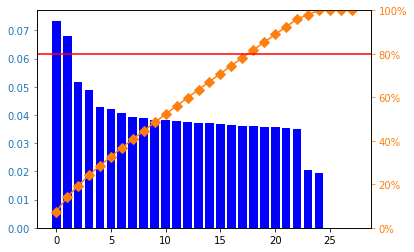

In [49]:
def pareto(data) :
    from matplotlib.ticker import PercentFormatter
    import numpy as np
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots()
    ax.bar(x,y,color="blue")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,100)
    plt.show()

pareto(pca.explained_variance_ratio_)

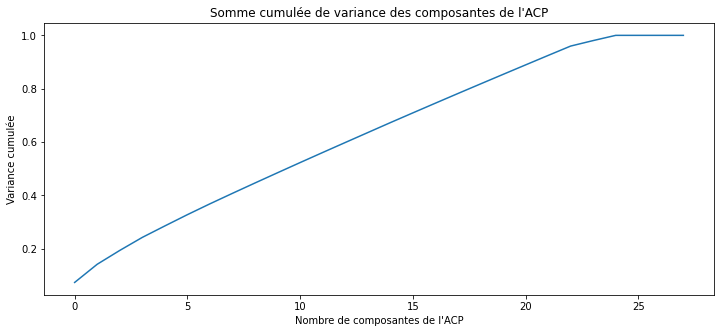

In [50]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X_scaled_df.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))

In [51]:
np.cumsum(pca.explained_variance_ratio_)[23]

0.9804277860113901

avec 23 features on a 98 % de la variance totale

In [52]:
colonnes_pca = X_scaled_df.columns
colonnes_pca

Index(['Nb_pdts', 'Total_moyen_achats', 'Nb_moyen_produits_par_commandes',
       'Delai_Moyen_Commande', 'Note_Moyenne_Commentaire', 'heure_achat',
       'jour_achat', 'freight_value', 'geolocation_lat', 'geolocation_lng',
       'categorie_la_plus_achetee_appliances',
       'categorie_la_plus_achetee_arts', 'categorie_la_plus_achetee_auto',
       'categorie_la_plus_achetee_construction',
       'categorie_la_plus_achetee_electronics',
       'categorie_la_plus_achetee_fashion',
       'categorie_la_plus_achetee_food_drinks',
       'categorie_la_plus_achetee_garden_pets',
       'categorie_la_plus_achetee_health_beauty',
       'categorie_la_plus_achetee_home', 'categorie_la_plus_achetee_office',
       'categorie_la_plus_achetee_other',
       'categorie_la_plus_achetee_sports_leisure', 'Moy_Paiment_boleto',
       'Moy_Paiment_credit_card', 'Moy_Paiment_debit_card',
       'Moy_Paiment_not_defined', 'Moy_Paiment_voucher'],
      dtype='object')

# Visualiser les résultats de l'ACP 

**biplot  - graphique qui représente la projection des individus sur deux composantes sélectionnées et la corrélation des variables avec ces composantes**

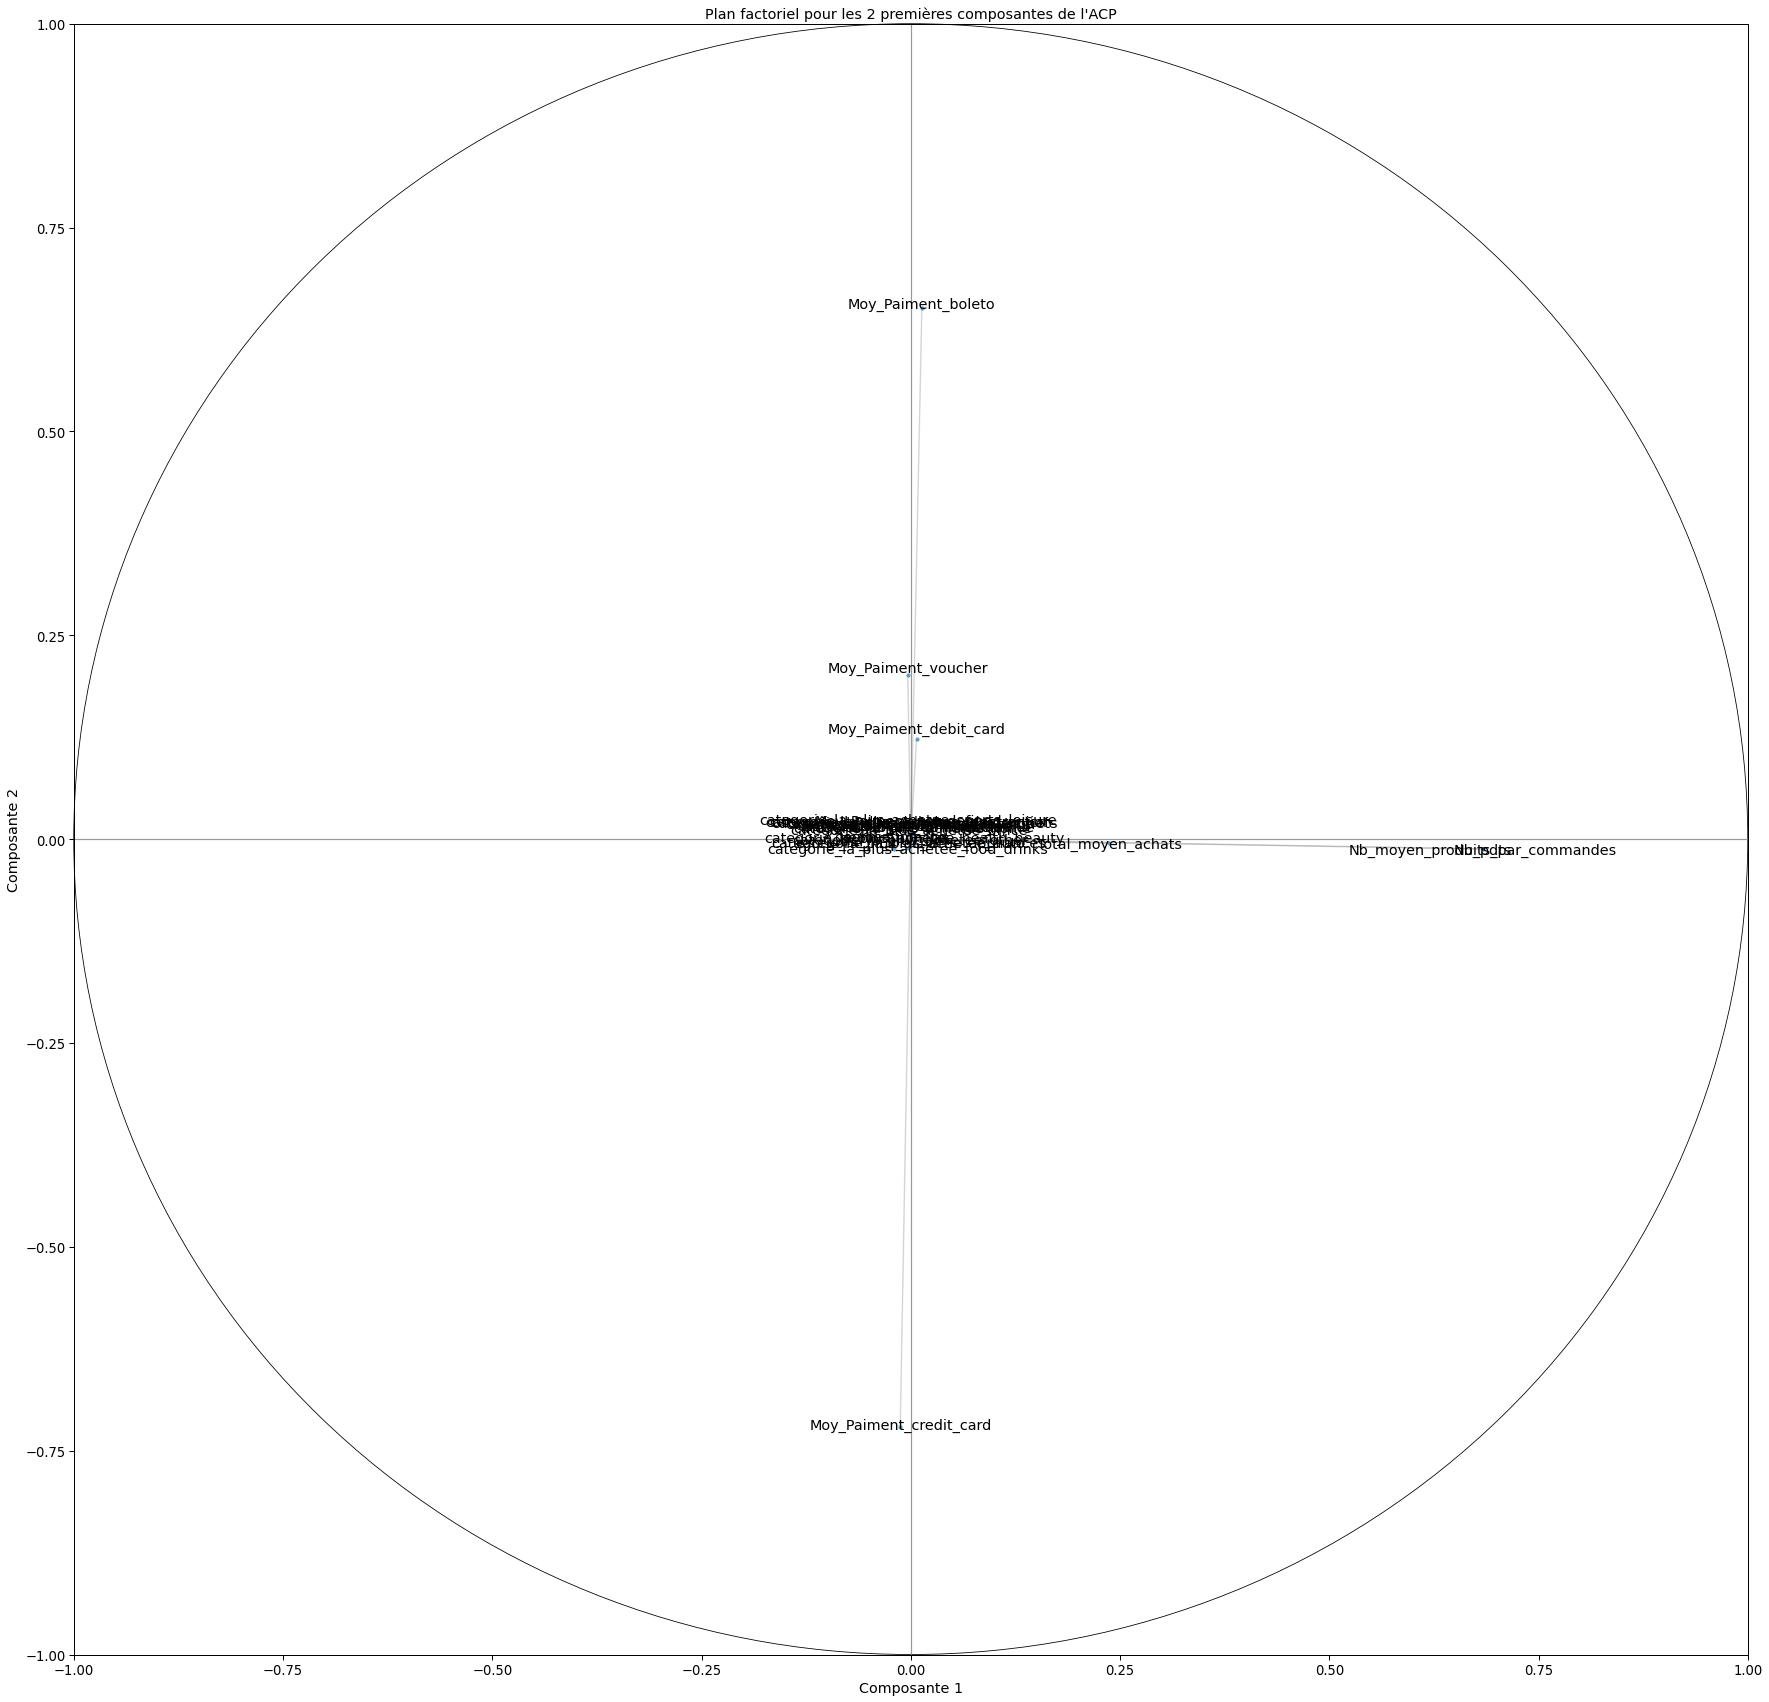

In [53]:
from matplotlib.patches import Circle

sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(30,30))

chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1) 

## T-SNE

**Le principe du tSNE est de réduire les dimensions en considérant que tous les points sont reliés par des petits ressorts. De façon stochastique, et par itération, le tSNE va essayer de proposer un modèle de réduction des dimensions correspondant à un modèle d'énergie minimisée.**



**Utilisation l'algorithme T-SNE pour avoir une idée en première approche du nombre de groupes homogènes**

In [54]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_pca.copy())

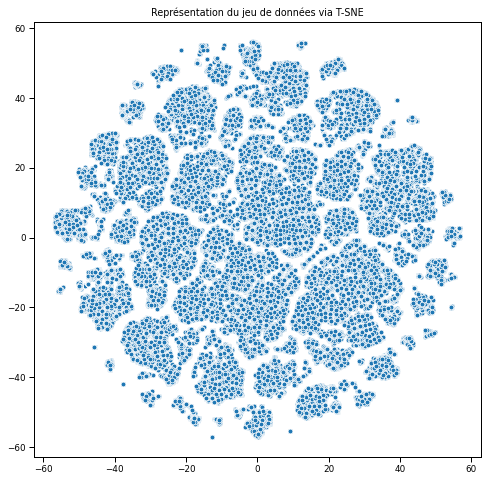

In [55]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
#sns.scatterplot(T[:,0], T[:,1])
sns.scatterplot(
    x=T[:,0], y=T[:,1],
    palette=sns.color_palette("hls", 10),
    legend="full")

# Kmeans

In [56]:
kmeans = KMeans(n_clusters=14,  
                random_state=0).fit(X_pca)
predict = kmeans.predict(X_pca)

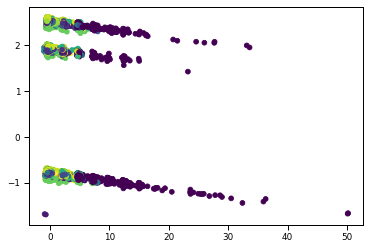

In [57]:
plt.scatter(X_pca[:,0],X_pca[:,1], c= predict)

In [58]:
kmeans.labels_.shape

(95560,)

### Recherche du nombre optimal de clusters


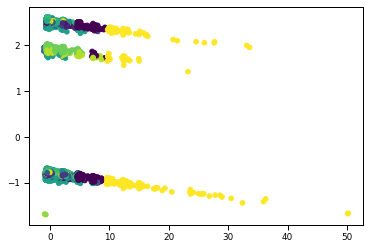

In [59]:
inertia = {}
dict_kmeans = {}

for k in range(1,20):
    
    kmeans = KMeans(n_clusters=k,
                   random_state=0)
    
    kmeans.fit(X_pca)
    predict = kmeans.predict(X_pca)
    
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    
plt.scatter(X_pca[:,0],X_pca[:,1], c= predict)

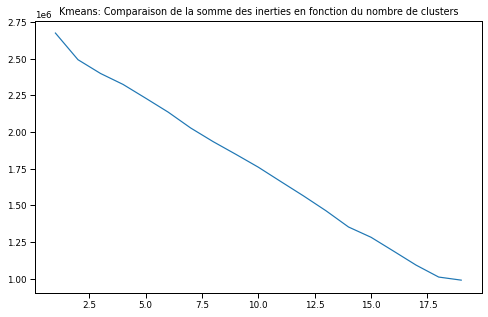

In [60]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

In [64]:
inertia = []
K_range = range(1, 20)
 
for k in K_range :
    model = KMeans(n_clusters=k).fit(X_pca)

    inertia.append(model.inertia_)

Text(0, 0.5, 'coût du modele (inertia)')

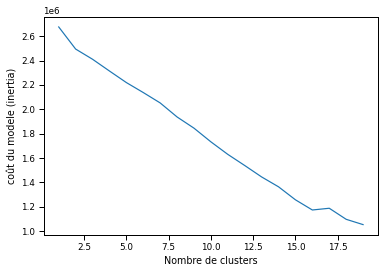

In [65]:
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('coût du modele (inertia)')

# Sélection du nombre de clusters avec analyse de silhouette

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(14,17)

for n_clusters in range_n_clusters:
    # Créer un sous-graphique avec 1 ligne et 2 colonnes
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Le premier sous-graphique est le graphique de la silhouette
    # Le coefficient de silhouette peut aller de -1, 1 mais dans cet exemple, tous se trouvent à l'intérieur [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # Le (n_clusters + 1) * 10 sert à insérer un espace vide entre la silhouette
    # plot individuelles, pour les délimiter clairement.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialisez le clusterer avec la valeur n_clusters et un générateur aléatoire
    # graine de 10 pour la reproductibilité.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # Le silhouette_score donne la valeur moyenne de tous les échantillons.
    # Cela donne une perspective sur la densité et la séparation des
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("pour n_clusters =", n_clusters,
          "Le score moyen de silhouette est :", silhouette_avg)

    # Calculez les scores de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agréger les scores de silhouette pour les échantillons appartenant au cluster i et les trier
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Étiquetez les parcelles de silhouette avec leurs numéros de cluster au milieu
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #Calculer le nouveau y_lower pour le prochain tracé
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualisation silhouette pour les différents clusters.")
    ax1.set_xlabel("Les valeurs du coefficient de silhouette")
    ax1.set_ylabel("Cluster label")

    # La ligne verticale pour le score de silhouette moyen de toutes les valeurs
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2e graphique montrant les grappes réelles formées
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Étiqueter les clusters
    centers = clusterer.cluster_centers_
    # Dessinez des cercles blancs au centre des groupes
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("La visualisation des données clusterisées.")
    ax2.set_xlabel("Espace de fonctionnalités pour la 1ère fonctionnalité")
    ax2.set_ylabel("Espace de fonctionnalités pour la 2eme fonctionnalité")

    plt.suptitle(("Analyse de silhouette pour le regroupement de KMeans sur des échantillons de données "
                  "Avec n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
X_pca_tot = pca.transform(X_scaled_df)

In [ ]:
x_show = pca.transform(X_scaled_df.select_dtypes(['float64','int32','uint8']))[:,0]

y_show = pca.transform(X_scaled_df.select_dtypes(['float64','int32','uint8']))[:,1]

z_show = pca.transform(X_scaled_df.select_dtypes(['float64','int32','uint8']))[:,2]

In [ ]:
nb_clusters = 16
if False:
    tsne = TSNE(n_components=2)
    T = tsne.fit_transform(X.copy())
    graph = pd.DataFrame(data = [T[:,0], T[:,1], model.labels_]).T
    graph.columns = ['X', 'Y', 'label']
    plt.figure(figsize=(10,10))
    plt.title('Représentation de la séparation des données du KMEANS via T-SNE')
    sns.scatterplot(graph['X'], graph['Y'], hue = graph['label'], legend='full',
                   palette=sns.color_palette("hls",14),
                    alpha=1, s=15,)
    plt.legend(loc='upper left', labels=graph['label'].unique())
    plt.show()
    
else:
        graph = pd.DataFrame(data = [clusterer.labels_]).T
        graph.columns = ['label']


In [ ]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

In [ ]:
X2=X_scaled_df.copy()

In [ ]:
X2['label'] = graph['label']
group_columns = X2.groupby('label').mean()

In [ ]:
clusterer.labels_.shape

In [ ]:
data_X = X.copy()
data_X['label'] = clusterer.labels_

In [ ]:
data_X.head(2)

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = data_X, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x = graph['label'].value_counts().index, 
           y=graph['label'].value_counts().values/len(graph)*100)

## Observation du mode des différents clusters pour chaque feature

In [ ]:
data_1 = data_X.groupby('label').agg(lambda x:x.value_counts().index[0])
data_1

In [ ]:
data_X.groupby('label').agg('mean')

**Identification des clusters**

In [ ]:
cluster = []
for i in range(16):
    cluster.append(X.loc[data_X['label'] == i])

In [ ]:
a = 0
for i in range(16):
    b = cluster[i].shape[0]
    a += b
    print('cluster {} : {} clients'.format(i,b))


## Observation :

# Localisation des clusters 

In [95]:
df = data_1.rename_axis('label').reset_index()

In [97]:
import folium

m = folium.Map(location=[-15.7797200, -47.9297200], zoom_start=6)

In [100]:
colors = ["red", "yellow", "gray", "green", "brown", "orange", "blue", "black", "pink", "violet", "darkturquoise",'skyblue','gold','olive','coral','bisque']
#labels = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14']
for i, c in enumerate(colors):
    print("Cluster {0} is {1}".format(i, c))
    df.apply(lambda row:folium.CircleMarker(location=[row['geolocation_lat'], row['geolocation_lng']], fill_color=colors[row['label']]).add_to(m), axis=1)
m

Cluster 0 is red
Cluster 1 is yellow
Cluster 2 is gray
Cluster 3 is green
Cluster 4 is brown
Cluster 5 is orange
Cluster 6 is blue
Cluster 7 is black
Cluster 8 is pink
Cluster 9 is violet
Cluster 10 is darkturquoise
Cluster 11 is skyblue
Cluster 12 is gold
Cluster 13 is olive
Cluster 14 is coral
Cluster 15 is bisque
Cluster 16 is chartreuse


Bilan : on n'observe pas de tendance nette sur la localisation des points : regroupement des groupes par quartier ou autre.

# Bilan

- Le cluster 0 correspond aux acheteurs majoritaires de la catégorie 'arts', ils utilisent le moins de facilité de paiement.
- Le cluster 1, ils n'ont pas de catégorie spécifique d'achat identifiée
- Le cluster 2 correspond aux acheteurs majoritaires de la catégorie 'health_beauty', ils utilisent le plus les facilité de paiement.
- Le cluster 3 correspond aux acheteurs majoritaires de la catégorie 'home',
- Le cluster 4 correspond aux acheteurs majoritaires de la catégorie 'fashion', ils utilisent le moins la carte de crédit.
- Le cluster 5 correspond aux acheteurs majoritaires de la catégorie 'sports'
- Le cluster 6 correspond aux acheteurs majoritaires de la catégorie 'garden and pets'
- Le cluster 7 correspond aux acheteurs majoritaires de la catégorie 'Construction',il commande le moins de produits en quantité.
- Le cluster 8 correspond aux acheteurs majoritaires de la catégorie 'other', il utilise le plus le moyen de paiement liquide.
- Le cluster 9 correspond aux clients majoritaires de la catégorie 'food_drinks', ils mettent les meilleures notes de commentaires, ils paient le plus de frais de port.
- Le cluster 10, ils n'ont pas de catégorie spécifique d'achat identifiée, il commande le plus de produits en quantité
- Le cluster 11 correspond aux acheteurs majoritaires de la catégorie 'auto', ils paient le plus par voucher.
- Le cluster 12 correspond aux acheteurs majoritaires de la catégorie 'electronics', ils paient le moins de frais de port.
- Le cluster 13, ils n'ont pas de catégorie spécifique d'achat identifiée, ils ont le plus grand délai de commande, ils font le moins d'achat et mettent le plus de mauvaises notes de commentaire

**Bilan:**
- Les clients qui ont le plus de délais de livraison mettent les plus mauvaises notes en moyenne.
- Les clients n'utilisent pas beaucoup les facilités de paiement.
- Des clusters d'acheteurs potentiels pour certaines catégories de produits ont été identifiés
- Des clients qui achètent le plus n'achète pas de catégories particulières de produits
- Le cluster des clients qui achète le plus de produits en quantité a également été identifié.
- Les localisations des clusters ont été identifiées.